


# EDA

## *Import packages*

In [53]:
# For data manipulation
import numpy as np  # linear algebra
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For hypothesis testing
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import norm

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler


import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

import joblib

## ***Accessing data***

In [54]:
from google.colab import drive
drive.mount('/content/drive')

# Load data
df1 = pd.read_csv("titanic_test.csv")
df2 = pd.read_csv("titanic_train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df2.duplicated().sum()

0

The two dataset don't have duplicates.

In [ ]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Concatenating vertically (axis=0)
df_vertical = pd.concat([df1, df2], axis=0)
df_vertical.shape

(1782, 12)

In [ ]:
df = df_vertical

In [ ]:
df.duplicated().sum()

714

Solving duplicates

In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(1068, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 0 to 553
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1068 non-null   int64  
 1   Survived     1068 non-null   int64  
 2   Pclass       1068 non-null   int64  
 3   Name         1068 non-null   object 
 4   Sex          1068 non-null   object 
 5   Age          891 non-null    float64
 6   SibSp        1068 non-null   int64  
 7   Parch        1068 non-null   int64  
 8   Ticket       1068 non-null   object 
 9   Fare         1068 non-null   float64
 10  Cabin        223 non-null    object 
 11  Embarked     1066 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 108.5+ KB


PassengerId: A unique identifier for each passenger.

Survived: Indicates whether the passenger survived (1) or not (0).

Pclass: The passenger's class on the ship. This is a proxy for socioeconomic status (1 = 1st class, 2 = 2nd class, 3 = 3rd class).

Name: The full name of the passenger.

Sex: The gender of the passenger (male or female).

Age: The age of the passenger. This may contain missing values, which are shown as NaN.

SibSp: The number of siblings or spouses the passenger had aboard the Titanic.

Siblings: Brother, sister, stepbrother, stepsister.
Spouse: Husband or wife (mistresses and fiancés were not included).

Parch: The number of parents or children the passenger had aboard the Titanic.

Parents: Mother, father.
Children: Daughter, son, stepdaughter, stepson.

Ticket: The ticket number of the passenger.

Fare: The amount of money the passenger paid for the ticket, in British pounds.

Cabin: The cabin number where the passenger stayed. This column has many missing values, as many passengers didn’t have a cabin.

Embarked: The port where the passenger boarded the Titanic.

C: Cherbourg
Q: Queenstown
S: Southampton
This dataset is often used in machine learning to predict survival based on different factors like age, gender, class, and fare.

Since Age: Age could be a strong predictor of survival, as there may have been prioritization (e.g., children and the elderly) during rescue efforts.

Gender (Sex): Gender is often considered a strong predictor, as women and children were given priority when boarding lifeboats.

Class (Pclass): Passenger class reflects socioeconomic status, which could have influenced access to lifeboats (e.g., first-class passengers may have had easier access).

Fare: Fare may correlate with class and can act as a proxy for wealth, which might be important for predicting survival.

Otherwise, PassengerId: This is just a unique identifier and doesn’t provide any predictive value for survival.

The ticket number itself doesn’t carry predictive value unless you can extract meaningful features from it (e.g., grouping passengers with the same ticket number who were likely traveling together).

Cabin: As discussed earlier, the cabin column has many missing values, and unless you extract something meaningful (like deck information), it’s better to drop this.



I decide to drop the following columns: PassengerId,
Ticket and
Cabin.



In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


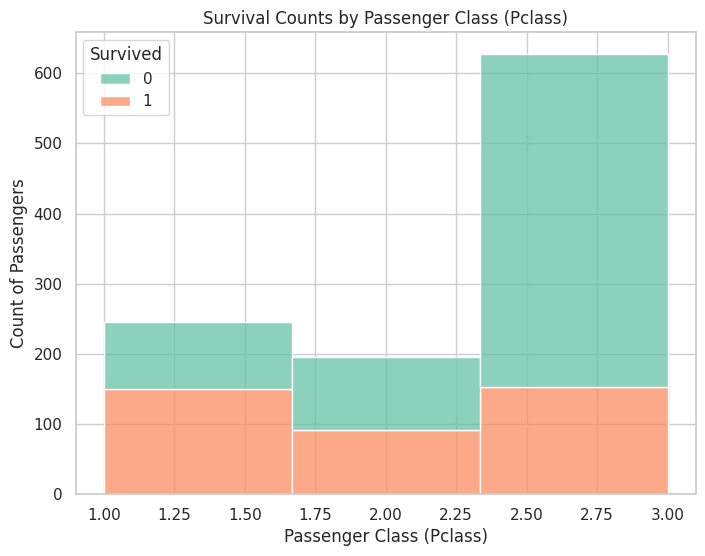

In [ ]:
# Checking how distributed the Survived for each class
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Pclass', hue='Survived', multiple='stack', bins=3, palette="Set2", kde=False)

# Add labels and title
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count of Passengers')
plt.title('Survival Counts by Passenger Class (Pclass)')

# Show the plot
plt.show()

We can see that a large number of people in the lower class did not survive.

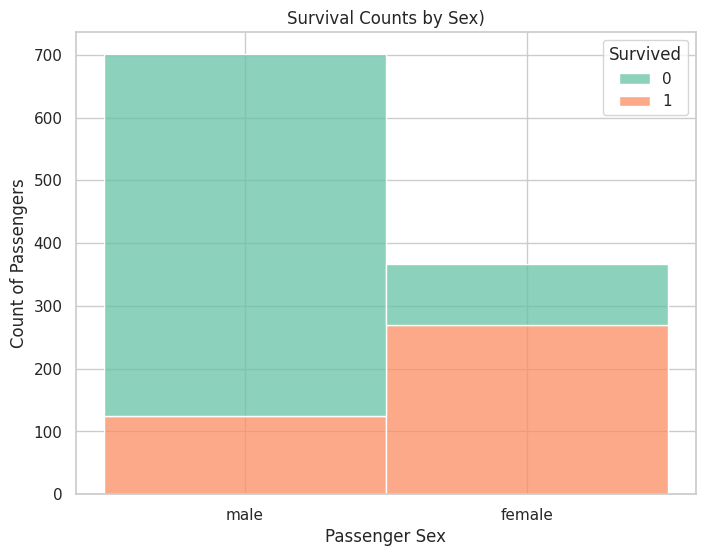

In [ ]:
# Checking how distributed the Survived for sex
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sex', hue='Survived', multiple='stack', bins=3, palette="Set2", kde=False)

# Add labels and title
plt.xlabel('Passenger Sex')
plt.ylabel('Count of Passengers')
plt.title('Survival Counts by Sex)')

# Show the plot
plt.show()

We can see that a significant number of men did not survive, but there were also many men among the passengers.

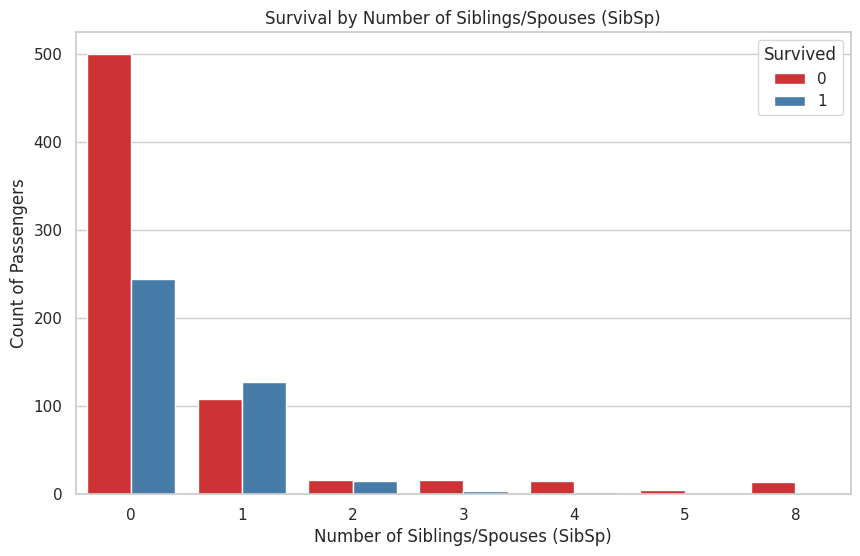

In [ ]:
# Checking how distributed the Survived for those who has siblings or/and spouse
# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot to show the distribution of SibSp according to Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Survived', palette='Set1')

# Add labels and title
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Count of Passengers')
plt.title('Survival by Number of Siblings/Spouses (SibSp)')

# Show the plot
plt.show()

In [ ]:
#percentage of each SibSp
quality_percentage = df['SibSp'].value_counts(normalize=True) * 100
quality_percentage.round(2)

,proportion
SibSp,
0,69.76
1,22.00
2,2.90
3,1.87
4,1.69
8,1.31
5,0.47


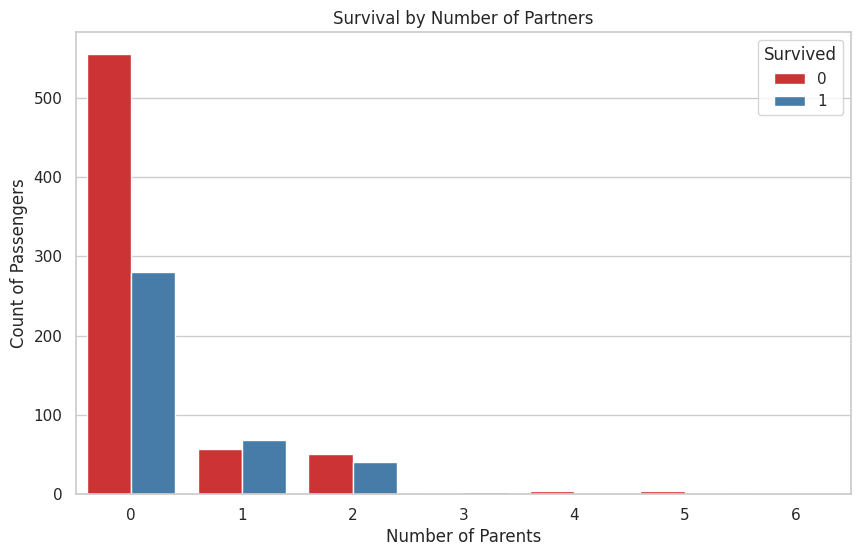

In [ ]:
# Checking how distributed the Parent for sex
# Checking how distributed the Survived for those who has siblings or/and spouse
# Set the style for the plot
sns.set(style="whitegrid")

# Create a count plot to show the distribution of SibSp according to Survival
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parch', hue='Survived', palette='Set1')

# Add labels and title
plt.xlabel('Number of Parents')
plt.ylabel('Count of Passengers')
plt.title('Survival by Number of Partners')

# Show the plot
plt.show()

A large number of individuals without siblings did not survive. On the other hand, 91% of the passengers either had no siblings or had a spouse on board. This indicates that cruises are more likely to be undertaken by couples, those traveling with a sibling, single individuals and a small family.

In [ ]:
#Finally checking the numbers of survivors
# Count of survivors (1)
survivors_count = df['Survived'].sum()

# Count of non-survivors (0)
non_survivors_count = df['Survived'].size - survivors_count

# Print results
print(f"Total Survivors: {survivors_count}")
print(f"Total Non-Survivors: {non_survivors_count}")

Total Survivors: 394
Total Non-Survivors: 674




The data shows that out of the total passengers, 394 survived, while 674 did not survive. This indicates that a significantly larger portion of the passengers perished (approximately 63%) compared to those who survived (around 37%). This imbalance highlights the tragic nature of the event and reflects the severity of the conditions during the Titanic disaster. Analyzing such an imbalanced dataset may require special techniques, such as resampling, to ensure predictive models are accurate and fair.



## Preprocessing the test set

In [56]:
# Drop irrelevant columns
df1 = df1.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Fill missing values
df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

# Create HasCabin feature and drop Cabin
df1['HasCabin'] = df1['Cabin'].notnull().astype(int)
df1 = df1.drop(columns=['Cabin'])

# Encode categorical variables
df1['Sex'] = df1['Sex'].map({'male': 1, 'female': 0})
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=True)

# Feature scaling (for Age and Fare)
scaler = StandardScaler()
df1[['Age', 'Fare']] = scaler.fit_transform(df1[['Age', 'Fare']])

# Create FamilySize feature
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

df1 = df1.drop(columns=['SibSp', 'Parch'])

# The dataset is now preprocessed and ready for model training
df1.head()

,Survived,Pclass,Sex,Age,Fare,HasCabin,Embarked_Q,Embarked_S,FamilySize
0,0,3,1,-0.565736,-0.502445,0,False,True,2
1,1,1,0,0.663861,0.786845,1,False,False,2
2,1,3,0,-0.258337,-0.488854,0,False,True,1
3,1,1,0,0.433312,0.420730,1,False,True,2
4,0,3,1,0.433312,-0.486337,0,False,True,1


In [ ]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 0 to 553
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1068 non-null   int64  
 1   Survived     1068 non-null   int64  
 2   Pclass       1068 non-null   int64  
 3   Name         1068 non-null   object 
 4   Sex          1068 non-null   int64  
 5   Age          891 non-null    float64
 6   SibSp        1068 non-null   int64  
 7   Parch        1068 non-null   int64  
 8   Ticket       1068 non-null   object 
 9   Fare         1068 non-null   float64
 10  Embarked_Q   1068 non-null   bool   
 11  Embarked_S   1068 non-null   bool   
 12  FamilySize   1068 non-null   int64  
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 102.2+ KB


## Preprocessing the train set

In [55]:
# Drop irrelevant columns
df2 = df2.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Fill missing values
df2['Age'].fillna(df2['Age'].median(), inplace=True)
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)

# Create HasCabin feature and drop Cabin
df2['HasCabin'] = df2['Cabin'].notnull().astype(int)
df2 = df2.drop(columns=['Cabin'])

# Encode categorical variables
df2['Sex'] = df2['Sex'].map({'male': 1, 'female': 0})
df2 = pd.get_dummies(df2, columns=['Embarked'], drop_first=True)

# Feature scaling (for Age and Fare)
scaler = StandardScaler()
df2[['Age', 'Fare']] = scaler.fit_transform(df2[['Age', 'Fare']])

# Create FamilySize feature
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

df2 = df2.drop(columns=['SibSp', 'Parch'])

# Your dataset is now preprocessed and ready for model training
df2.head()

,Survived,Pclass,Sex,Age,Fare,HasCabin,Embarked_Q,Embarked_S,FamilySize
0,1,1,1,3.891554,-0.044381,1,False,True,1
1,0,3,1,3.430455,-0.491874,0,False,True,1
2,0,1,1,3.199906,0.049330,1,False,False,1
3,0,1,1,3.199906,0.348330,0,False,False,1
4,0,3,1,3.161481,-0.492378,0,True,False,1


# Machine Learning application

Splitting the dataset

In [60]:

X_train = df2.drop('Survived', axis=1)
y_train = df2['Survived']
X_test = df1.drop('Survived', axis=1)
y_test = df1['Survived']
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

## Using linear regression

In [58]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
print("R-squared:", linear_model.score(X_test, y_test))

R-squared: 0.40176016307681983


Using SMOTE on the train set

In [62]:
# Create the SMOTE object
smote = SMOTE(
    sampling_strategy='auto',  # Strategy to sample the minority class. 'auto' means resample all minority classes.
    random_state=42,           # Seed for random number generation.
    k_neighbors=5,             # Number of nearest neighbors to use for generating synthetic samples.
    n_jobs=None                # Number of CPU cores to use (-1 means use all available cores).
)

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

In [63]:
# Initialize and train the model with Ridge regularization (L2 regularization)
# logistic_model_ridge = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=10000, C=1.0 )
logistic_model_ridge = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', max_iter=10000, C=1.1, class_weight='balanced')
logistic_model_ridge.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model_ridge.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7912457912457912
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       549
           1       0.71      0.77      0.74       342

    accuracy                           0.79       891
   macro avg       0.78      0.79      0.78       891
weighted avg       0.80      0.79      0.79       891



## Decision Tree

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       1.00      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



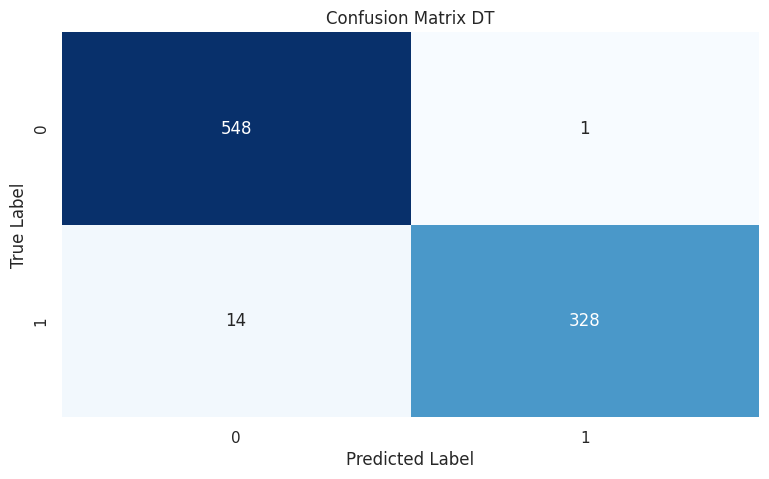

In [64]:
# Create decision tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model

print(classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(9, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix DT')
plt.show()

## Random Forest

Accuracy: 0.9831649831649831
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.99      0.97      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



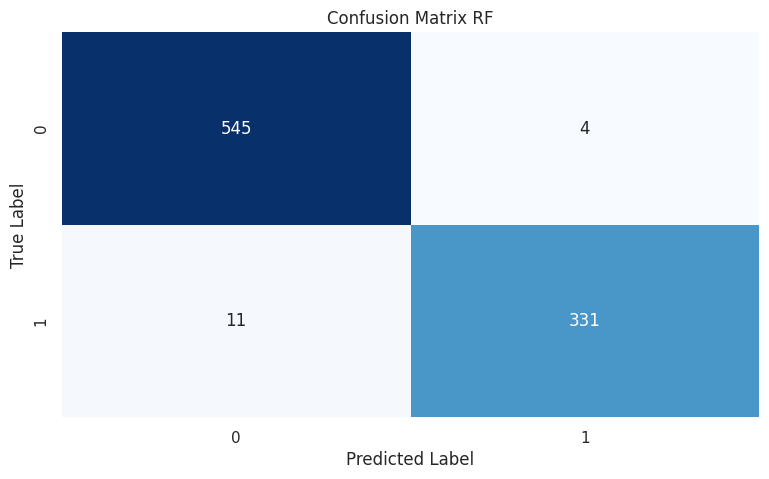

In [65]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,
    class_weight='balanced'  # Handle class imbalance within the Random Forest
)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(9, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix RF')
plt.show()

## Gradient Boost Classifier

In [66]:
gbm = GradientBoostingClassifier()

In [67]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

In [68]:
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='f1_weighted')


In [69]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [70]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       549
           1       0.87      0.71      0.78       342

    accuracy                           0.85       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



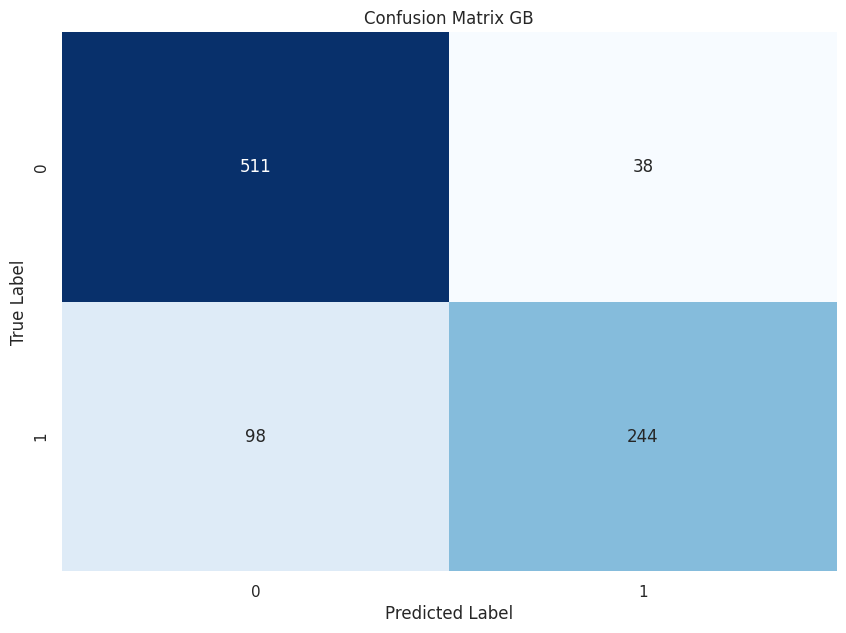

In [71]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix GB')
plt.show()

## XGB Classifier

Accuracy: 0.9663
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       549
           1       0.97      0.94      0.96       342

    accuracy                           0.97       891
   macro avg       0.97      0.96      0.96       891
weighted avg       0.97      0.97      0.97       891



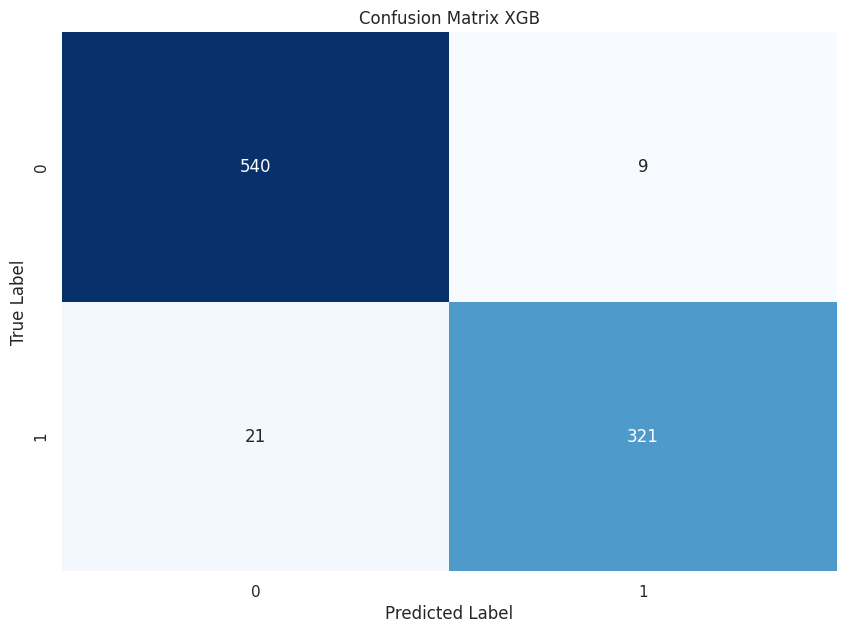

In [73]:
model = XGBClassifier( use_label_encoder=False, eval_metric='mlogloss')
xgb_cv = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix XGB')
plt.show()

Random Forest has the best accuracy

# Most important feature

      Feature  Importance
3        Fare    0.262655
2         Age    0.261873
1         Sex    0.254680
7  FamilySize    0.077328
0      Pclass    0.068514
4    HasCabin    0.043069
6  Embarked_S    0.022126
5  Embarked_Q    0.009755


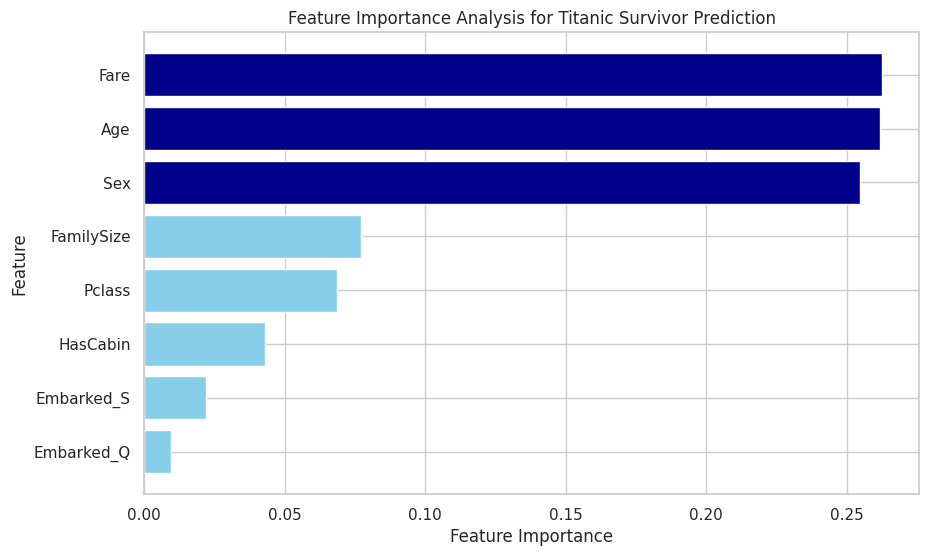

In [76]:
# Extract feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a list of colors for the bars
colors = ['darkblue' if importance > 0.10 else 'skyblue' for importance in feature_importance_df['Importance']]

# Display the DataFrame
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis for Titanic Survivor Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

The top features—Fare, Age, and Sex—are highly significant, which aligns with their expected influence on survival. Lower-ranked features like Embarked_S and Embarked_Q have minimal impact, indicating they contribute less to the model’s predictions. This distribution can help guide feature selection and emphasize the importance of focusing on the most influential variables.

Based on the feature importance ranking, here are some recommendations for the cruise industry to improve passenger experience and safety:

Fare Management and Pricing:

Tailored Pricing: Consider implementing dynamic pricing models that can better reflect the value and service level expected by passengers. Since fare is a highly influential feature, providing more personalized pricing options could enhance passenger satisfaction.
Value-Added Services: Offer premium services and experiences for higher fare categories to match the expectations of passengers who are willing to pay more.
Age-Related Services:

Age-Based Amenities: Develop amenities and services tailored to different age groups. For example, families with young children might appreciate more kid-friendly activities, while older passengers might benefit from more relaxed, health-focused options.
Safety Measures: Implement age-specific safety measures and assistive services. Ensure that safety protocols consider the needs of elderly passengers or those with special requirements.
Gender-Specific Considerations:

Safety and Comfort: Ensure that both male and female passengers have equal access to safety measures and comfort options. Gender-specific needs might not be significant, but it’s essential to provide a balanced experience for all.
Inclusive Policies: Develop policies and services that are inclusive and respectful of all gender identities, ensuring a positive experience for every passenger.
Family-Focused Features:

Family Packages: Create family packages and discounts that make traveling with family more affordable and enjoyable. Family size is a notable feature, so targeting family-centric promotions and activities can be beneficial.
Family Activities: Offer activities and services designed for different family sizes, ensuring that families of all sizes can find engaging and appropriate options.
Class and Cabin Features:

Enhanced Cabin Features: Given the importance of cabin-related features, ensure that all cabins meet high standards of comfort and safety. Consider offering upgrades or options to enhance the cabin experience based on passenger preferences.
Class Differentiation: Clearly differentiate between classes and provide unique benefits and amenities for each class to enhance the passenger experience.
Embarkation Points:

Optimize Embarkation Process: Although embarkation point has less impact, streamlining the embarkation process and ensuring a smooth experience at different ports can still improve overall passenger satisfaction.
Local Experiences: Offer localized experiences and promotions based on the embarkation point to enhance the travel experience from the very beginning.
By focusing on these areas, the cruise industry can improve passenger satisfaction, enhance safety, and create a more personalized and enjoyable travel experience.